# Morlet Wavelet

Compare the wavelet shape between python and IDL

In [1]:
%pylab inline
from bokeh.plotting import figure as figbok
from bokeh.io import output_notebook
from bokeh.io import show as showbok
output_notebook()

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

## In Fourier space

In [52]:
from wavan import uv_plane

In [105]:
N = 512.

ko= 5.336
scale = 5.
a = scale * ko

x, y, shiftx, shifty, ishiftx, ishifty = uv_plane(N, N)
t = 0.

morletFT =np.exp( -.5*((a*x - ko*np.cos(t))**2. + (a*y - ko*np.sin(t))**2.))

Tools = 'pan,box_zoom,wheel_zoom,reset,save'
f = figbok( x_axis_label="x", y_axis_label="Amplitude",tools=Tools)
f.line(x[0,:], morletFT[int(N/2),:], legend='Scale '+np.str(a))

showbok(f)

In [117]:
#morletFT= np.roll(morletFT,int(shiftx), axis=1)
#morletFT= np.roll(morletFT,int(shifty), axis=0)
#morlet = np.fft.ifft(morletFT)
#morlet= np.roll(morlet,int(shiftx), axis=1)
#morlet= np.roll(morlet,int(shifty), axis=0)

#Gaussian define in Fourier space
r = np.sqrt(x**2. + y**2.)
gaussFT = np.exp(-.5*(r*a)**2.)

gaussFT= np.roll(gaussFT,int(shiftx), axis=1)
gaussFT= np.roll(gaussFT,int(shifty), axis=0)
gauss = np.fft.ifft(gaussFT)
gauss= np.roll(gauss,int(shiftx), axis=1)
gauss= np.roll(gauss,int(shifty), axis=0)

Tools = 'pan,box_zoom,wheel_zoom,reset,save'
f = figbok( x_axis_label="x", y_axis_label="Amplitude",tools=Tools)
f.line(x[0,:], morlet[int(N/2),:].real, legend='Scale '+np.str(a))
f.line(x[0,:], np.abs(gauss[int(N/2),:]), legend='Gaussian',color='orange')

showbok(f)

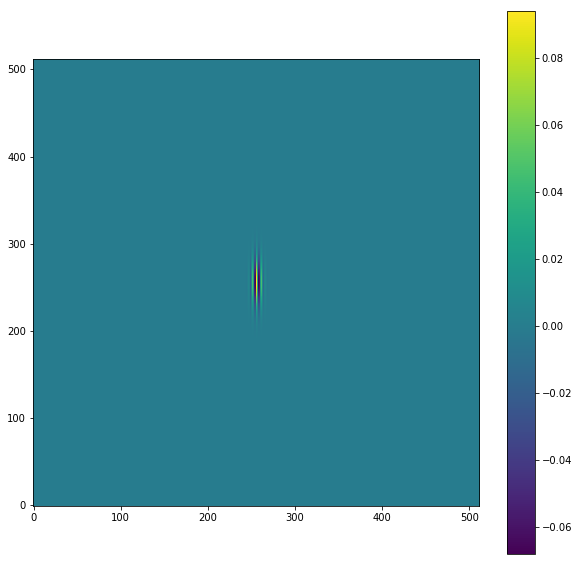

In [107]:
figure(figsize=(10,10))
imshow(morlet.real,origin='below')
plt.colorbar()

## In X-space

In [22]:
morletFT = np.fft.fft(morlet)
morletFTsh = np.fft.fftshift(morletFT)

freqsh = np.fft.fftfreq(int(N))
freq = np.fft.fftshift(freqsh)

Tools = 'pan,box_zoom,wheel_zoom,reset,save'
f = figbok( x_axis_label="u", y_axis_label="Amplitude",tools=Tools)
f.line(freq, abs(morletFTsh), legend='Scale '+np.str(a))

showbok(f)
print np.max(abs(morletFTsh))

26.256770181613017


In [34]:
from wavan import uv_plane

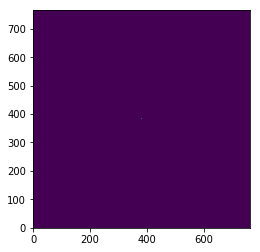

In [46]:
ko= 5.336
scl = 0.01869
reso = 0.2333334
a = ko / (scl*reso)
x, y, shiftx, shifty, ishiftx, ishifty = uv_plane(763, 766)
r = np.sqrt(x**2. + y**2.)

kernel = np.exp(-.5*(r*a)**2.)
imshow(kernel,origin='lower')